# 복습과제 문제

## 문제 1

다음 중 결정 트리의 불순도에 대해 옳게 설명한 것을 모두 선택하시오.<br>

(A) 지니 불순도는 부모 노드의 불순도와 자식 노드의 불순도의 차이로 계산한다. <br>
(B) 지니 불순도는 클래스의 비율을 제곱하여 모두 더한 다음 1에서 뺀다.<br>
(C) 엔트로피 불순도는 1에서 가장 큰 클래스 비율을 빼서 계산한다.<br>
(D) 엔트로피 불순도는 클래스 비율과 클래스 비율에 밑이 2인 로그를 적용한 값을 곱해서 모두 더한 후 음수로 바꾸어 계산한다.<br>

답: (B), (D)

## 문제 2

In [1]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

import numpy as np
import pandas as pd

### 2-1. 데이터 불러오기 및 데이터프레임으로 변환

import된 load_boston 데이터를 데이터프레임으로 변환해 'target' 열을 추가하고, 완성된 데이터프레임의 상위 5개의 항목을 출력하세요.
> hint : data=boston['data'], columns=boston['feature_names'], target=boston.target

In [2]:
# 데이터프레임 변환
boston = load_boston()
df = pd.DataFrame(boston['data'], columns=boston['feature_names'])

# 'target'열 추가
df['target'] = boston['target']

# 상위 5개 관측 출력
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 2-2. 데이터 결측치 확인

df.isnull().sum() 메서드를 이용해 불러온 데이터셋의 null 개수를 확인하세요

In [3]:
df.isnull().sum() # 결측치 없음

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

### 2-3. 데이터, 타깃값 분리 및 데이터 전처리

데이터프레임에서 다시 data와 target을 각각 X, y에 저장하고, StandardScaler를 통해 정규화하세요.

In [4]:
# features & target 분리
X = df.drop(['target'], axis=1, inplace=False)
y = df['target']

In [5]:
# 정규화 by StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### 2-4. train-test split

정규화된 X, y를 train_test_split()을 이용해 각각 X_train, X_test, y_train, y_test로 나누세요.<br>
* test_size=0.3, random_state=777

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=777)

### 2-5. KNN과 그리드서치를 활용한 모델 학습

GridSearchCV()를 활용해 n_neightbors 파라미터를 5~9까지 테스트하며 KNeighborsRegressor()를 학습시키세요.<br>
* cv=5, n_jobs=-1

In [7]:
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': [5,6,7,8,9]}
knn_grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [5, 6, 7, 8, 9]})

위의 코드를 통해 얻어진 모델에서 best_params_를 통해 가장 성능이 좋았던 파라미터 수치를, best_score_를 통해 점수를 출력하세요.

In [8]:
print('최적 파라미터:', knn_grid.best_params_)  
print('최고 점수:', knn_grid.best_score_)

최적 파라미터: {'n_neighbors': 7}
최고 점수: 0.7532121281467716


### 2-5. 모델 평가

가장 성능이 좋았던 파라미터 값을 가진 모델을 best_knn에 저장하고, test score를 출력하세요.
> hint : best_estimator_

In [9]:
best_knn = knn_grid.best_estimator_
best_knn.score(X_test, y_test)

0.7210947255997551

best_knn에서 10개의 값을 '실제값 : {}, 예측값 : {}'의 형태로 소수점 네자리까지 나타내세요.
> hint : 현재 y_test의 인덱스가 0부터 순서대로가 아님. 별도의 처리 필요

In [10]:
a = y_test.sort_index()[:10] # 실제값(Series)
b = best_knn.predict(X_test)[:10] # 예측값(Array)

for i in range(10):
    print('실제값: {0:.4f}, 예측값: {1:.4f}'.format(a.iloc[i], b[i]))

실제값: 28.7000, 예측값: 18.9571
실제값: 22.9000, 예측값: 11.1857
실제값: 27.1000, 예측값: 11.7571
실제값: 18.9000, 예측값: 24.2714
실제값: 21.7000, 예측값: 27.9857
실제값: 19.6000, 예측값: 17.3143
실제값: 15.2000, 예측값: 21.2429
실제값: 15.6000, 예측값: 29.7714
실제값: 13.9000, 예측값: 19.4143
실제값: 20.0000, 예측값: 42.0714


## 문제 3

### 3-1. 데이터 불러오기 및 타깃값 분리

다시 boston data를 불러오고, 결측치 확인 과정 없이 data, target을 각각 X, y에 나누어 저장하세요.

In [11]:
from sklearn.datasets import load_boston

df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
df['target'] = boston['target']

X = df.drop(['target'], axis=1, inplace=False)
y = df['target']

### 3-2. 전처리 및 train test split

StandardScaler를 통해 정규화하고, 이를 X_train, X_test, y_train, y_test에 나누어 저장하세요.
* test_size=0.3, random_state=777

In [12]:
# 정규화
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [13]:
# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=777)

### 3-3. RegressionSVM과 그리드 서치를 활용한 모델 학습

> svm의 특성상 많은 시간이 걸릴 수 있음

GridSearchCV()를 활용해 주어진 파라미터를 테스트하며 SVR()을 학습시키세요.<br>
* param_grid {'C': [10, 100], 'gamma':[10, 100], 'kernel':['linear', 'poly', 'rbf']}
* cv=5, n_jobs=-1

In [14]:
svr = SVR()
param_grid = {'C':[10, 100], 'gamma': [10, 100], 'kernel': ['linear', 'poly', 'rbf']}
svr_grid = GridSearchCV(estimator=svr, param_grid = param_grid, cv=5, n_jobs=-1)
svr_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [10, 100], 'gamma': [10, 100],
                         'kernel': ['linear', 'poly', 'rbf']})

위의 코드를 통해 얻어진 모델에서 best_params_를 통해 가장 성능이 좋았던 파라미터 수치를, best_score_를 통해 점수를 출력하세요.

In [15]:
print('최적 파라미터:', svr_grid.best_params_)  
print('최고 점수:', svr_grid.best_score_)

최적 파라미터: {'C': 100, 'gamma': 10, 'kernel': 'linear'}
최고 점수: 0.7089540416083381


### 3-3. 모델 평가

가장 성능이 좋았던 파라미터 값을 가진 모델을 best_svr에 저장하고, test score를 출력하세요.

In [16]:
best_svr = svr_grid.best_estimator_
best_svr.score(X_test, y_test)

0.6983482801294308

best_svr에서 10개의 값을 '실제값 : {}, 예측값 : {}'의 형태로 소수점 네자리까지 나타내세요.

In [17]:
a = y_test.sort_index()[:10] # 실제값(Series)
b = best_svr.predict(X_test)[:10] # 예측값(Array)

for i in range(10):
    print('실제값: {0:.4f}, 예측값: {1:.4f}'.format(a.iloc[i], b[i]))

실제값: 28.7000, 예측값: 17.7136
실제값: 22.9000, 예측값: 9.5201
실제값: 27.1000, 예측값: 13.0421
실제값: 18.9000, 예측값: 22.9529
실제값: 21.7000, 예측값: 32.2076
실제값: 19.6000, 예측값: 18.9283
실제값: 15.2000, 예측값: 16.6494
실제값: 15.6000, 예측값: 33.0320
실제값: 13.9000, 예측값: 11.9200
실제값: 20.0000, 예측값: 34.2142


## 문제4

### 다음 mushroom data에 있는 모자의 모양, 자루의 크기, 서식지, 군락의 모양 등 다양한 특징을 이용하여 버섯을 분류하려고 합니다.
### 문제를 잘 읽고 답해주세요.

In [59]:
import requests
import zipfile
from io import StringIO
from sklearn.preprocessing import LabelEncoder
import io
import pydot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [60]:
mush_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(mush_data_url).content
mush_data = pd.read_csv(io.StringIO(s.decode("utf-8")), header=None)
mush_data.columns = ["classes", "cap_shape", "cap_surface",
                     "cap_color", "odor", "bruises",
                     "gill_attachment", "gill_spacing",
                     "gill_size", "gill_color", "stalk_shape",
                     "stalk_root", "stalk_surface_above_ring",
                     "stalk_surface_below_ring",
                     "stalk_color_above_ring",
                     "stalk_color_below_ring",
                     "veil_type", "veil_color","ring_number",
                     "ring_type", "spore_print_color",
                     "population", "habitat"]

### 4-1. "gill_color", "gill_attachment", "odor", "cap_color" 열을 제거해주세요.

In [61]:
mush_data.drop(['gill_color', 'gill_attachment', 'odor', 'cap_color'], axis=1, inplace=True)
mush_data.head()

,classes,cap_shape,cap_surface,bruises,gill_spacing,gill_size,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,p,c,n,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,a,c,b,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,l,c,b,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,p,c,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,n,w,b,t,e,s,s,w,w,p,w,o,e,n,a,g


### 4-2. 결측치 확인 과정 없이 data, target을 각각 X, y에 나누어 저장하고 training data와 test data로 나누세요. (test_size = 0.3, random_state=42)

In [62]:
# 특징변수(X)와 반응변수(y)로 분리
X = mush_data.drop(['classes'], axis=1, inplace=False)
y = mush_data['classes']

In [63]:
# 레이블인코딩
for col in X.columns:
    encoder = LabelEncoder()
    encoder.fit(X[col])
    X[col] = encoder.transform(X[col])

In [64]:
# 훈련데이터와 테스트데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 4-3. Decision Classifier를 학습시키세요.(하이퍼 파라미터는 자유롭게, random_state=42)

In [65]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### 4-4. 학습시킨 모델에 test data를 넣고 이를 도표로 표현하세요

In [58]:
# *도표로 표현?? 이걸 하라는게 맞나용..?
# pred = dtc.predict(X_test)
# df = pd.DataFrame(pred.reshape(-1,1), columns=['예측값']) 
# df['실제값'] = y
# df['일치여부'] = np.where(df['예측값']==df['실제값'], '일치', '불일치')
# df

,예측값,실제값,일치여부
0,e,p,불일치
1,p,e,불일치
2,p,e,불일치
3,e,p,불일치
4,p,e,불일치
5,p,e,불일치
6,p,e,불일치
7,p,e,불일치
8,e,p,불일치
9,e,e,일치


In [67]:
# Accuracy; 왜 1이 나올까요...?ㅠㅠ 
from sklearn.metrics import accuracy_score
pred = dtc.predict(X_test)
print('test accuracy: {0:.4f}'.format(accuracy_score(y_test, pred)))

test accuracy: 1.0000


### 4-5. graphviz를 통해 의사결정트리를 시각화하세요

anaconda prompt에 conda install graphviz, conda install pydotplus 설치하신 후 실행해주세요!

In [30]:
import pydotplus
from sklearn.tree import export_graphviz
from IPython.core.display import Image

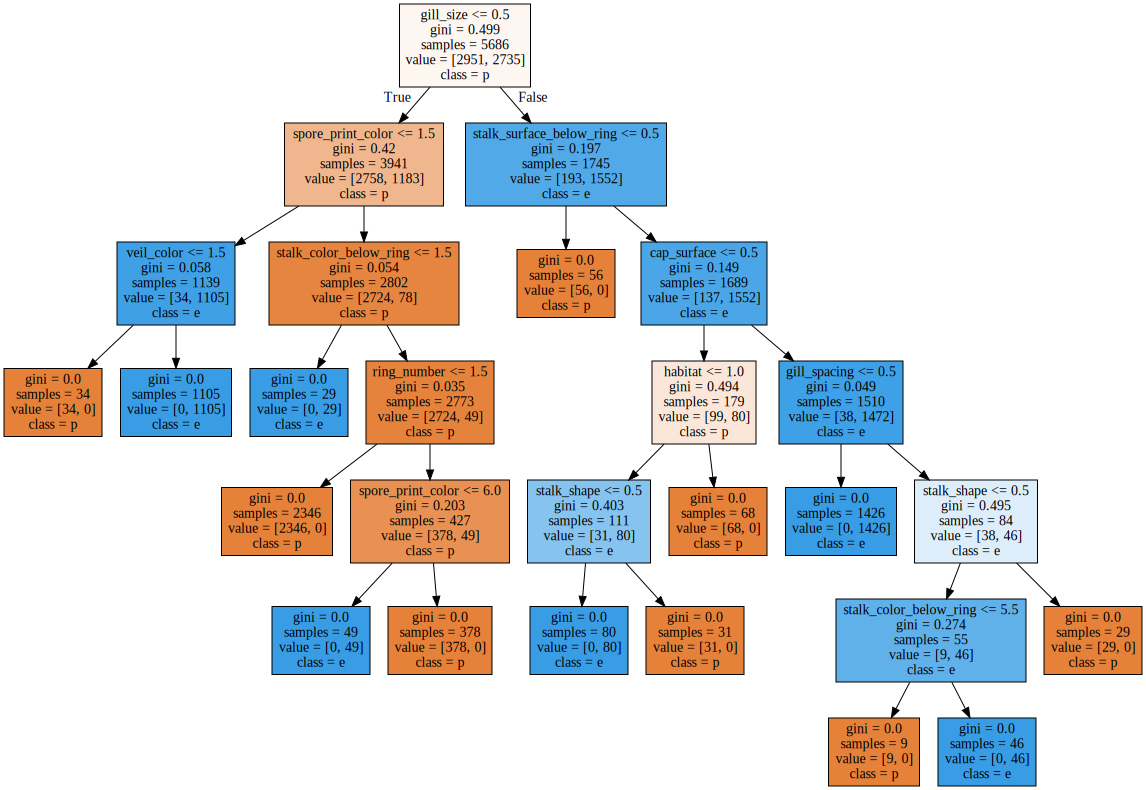

In [31]:
export_graphviz(dtc, out_file='tree.dot', class_names=['p','e'],
              feature_names=X.columns, impurity=True, filled=True)

import graphviz 

with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)